In [78]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [79]:
def synthetic_data(w, b, num_examples):
    """生成y = xw + b +噪声"""
    x = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(x, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return x, y.reshape((-1, 1))

In [80]:
true_w = torch.tensor([2 ,-3.4],dtype=torch.float)
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [81]:
print("features", features[0],'\nlabels', labels[0])

features tensor([ 0.5083, -0.3167]) 
labels tensor([6.2956])


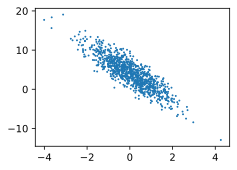

In [82]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(),1 )

In [83]:
# 生成迭代器
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = torch.randperm(num_examples)
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        batch_indices = torch.tensor(indices[i:min(i+batch_size,num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [84]:
batch_size = 10

In [85]:
for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-1.1826, -2.4335],
        [-1.5070,  0.0584],
        [-1.1826, -2.4335],
        [-0.2933,  1.9803],
        [ 0.3293, -1.4760],
        [-1.5070,  0.0584],
        [-0.1965, -1.2852],
        [ 1.3028,  0.8986],
        [-1.5070,  0.0584],
        [-0.1965, -1.2852]]) 
 tensor([[10.1133],
        [ 0.9738],
        [10.1133],
        [-3.1304],
        [ 9.8895],
        [ 0.9738],
        [ 8.1559],
        [ 3.7569],
        [ 0.9738],
        [ 8.1559]])


C:\Users\furoc\AppData\Local\Temp\ipykernel_3780\3939589794.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  batch_indices = torch.tensor(indices[i:min(i+batch_size,num_examples)])


In [86]:
w = torch.normal(0,0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1,requires_grad=True)

In [87]:
# 线性回归模型
def linear_regression(X, w, b):
    return torch.matmul(X, w) + b

In [88]:
# 均方损失
def square_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

In [89]:
# 小批量随机梯度下降
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [90]:
lr = 0.03
num_epochs = 5
net = linear_regression
loss = square_loss

In [91]:
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch}, loss: {float(train_l.mean()):f}')

C:\Users\furoc\AppData\Local\Temp\ipykernel_3780\3939589794.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  batch_indices = torch.tensor(indices[i:min(i+batch_size,num_examples)])


epoch 0, loss: 0.043127
epoch 1, loss: 0.000178
epoch 2, loss: 0.000051
epoch 3, loss: 0.000051
epoch 4, loss: 0.000051


In [92]:
w

tensor([[ 1.9998],
        [-3.3988]], requires_grad=True)

In [93]:
b

tensor([4.2002], requires_grad=True)

# 线性回归的简洁实现

In [94]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

In [95]:
true_w = torch.tensor([2 ,-3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [96]:
def load_array(data_array, batch_size, is_train=True):
    """构造一个迭代器"""
    dataset = data.TensorDataset(*data_array)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

In [97]:
batch_size = 10
data_iter = load_array((features, labels), batch_size)
next(iter(data_iter))

[tensor([[-1.2144,  2.7051],
         [-0.3122,  1.1309],
         [ 0.2795, -1.0489],
         [-0.8246, -0.1516],
         [ 0.3058, -1.5884],
         [ 0.9355,  0.6081],
         [ 0.7462,  2.1860],
         [-0.6092,  1.7859],
         [ 0.1442,  0.1974],
         [-0.0916, -0.8469]]),
 tensor([[-7.4273],
         [-0.2850],
         [ 8.3418],
         [ 3.0811],
         [10.2364],
         [ 4.0036],
         [-1.7549],
         [-3.0756],
         [ 3.8102],
         [ 6.8969]])]

In [98]:
from  torch import nn
net = nn.Sequential(nn.Linear(2, 1))

In [99]:
net[0].weight.data.normal_(0,0.01)
net[0].bias.data.fill_(0)

tensor([0.])

In [100]:
loss = nn.MSELoss()

In [101]:
trainer = torch.optim.SGD(net.parameters(), lr=0.03)

In [102]:
num_epochs = 3
for epoch in range(num_epochs):
    for X,y in data_iter:
        l = loss(net(X), y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch}, loss: {l:f}')

epoch 0, loss: 0.000260
epoch 1, loss: 0.000097
epoch 2, loss: 0.000096
